# Background

About Dataset
The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.

Creator: Francesco Fontanella

Source: https://archive.ics.uci.edu/dataset/732/darwin

The DARWIN dataset was created to allow researchers to improve the existing machine-learning methodologies for the prediction of Alzheimer's disease via handwriting analysis.

Citation Requests/Acknowledgements

N. D. Cilia, C. De Stefano, F. Fontanella, A. S. Di Freca, An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis, Procedia Computer Science 141 (2018) 466–471. https://doi.org/10.1016/j.procs.2018.10.141

N. D. Cilia, G. De Gregorio, C. De Stefano, F. Fontanella, A. Marcelli, A. Parziale, Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking, Engineering Applications of Artificial Intelligence, Vol. 111 (20229) 104822. https://doi.org/10.1016/j.engappai.2022.104822

Protocol: The researchers developed a protocol consisting of 25 handwriting tasks designed to assess different aspects of cognitive and motor function potentially affected by AD. These tasks fall into three categories: Graphic, Copy, and Memory.

Data Acquisition: They collected data from 174 participants (89 AD patients and 85 healthy controls) using a Wacom Bamboo tablet, recording pen tip movements and pressure.

Feature Extraction: From the raw data, they extracted 18 features per task, encompassing measures of time, speed, acceleration, jerk, pressure, and spatial characteristics.

#### The target variable they are trying to predict is whether a participant has Alzheimer's disease (A) or healthy (H).

    P: Stands for "Patients", referring to individuals diagnosed with Alzheimer's Disease.
    H: Stands for "Healthy", referring to individuals who are not diagnosed with Alzheimer's Disease and serve as a control group.

#### Description Category: 25 tasks

    1 Signature drawing M
    2 Join two points with a horizontal line, continuously for four times G
    3 Join two points with a vertical line, continuously for four times G
    4 Retrace a circle (6 cm of diameter) continuously for four times G
    5 Retrace a circle (3 cm of diameter) continuously for four times G
    6 Copy the letters ‘l’, ‘m’ and ‘p’ C
    7 Copy the letters on the adjacent rows C
    8 Write cursively a sequence of four lowercase letter ‘l’, in a single smooth movement C
    9 Write cursively a sequence of four lowercase cursive bigram ‘le’, in a single smooth movement C
    10 Copy the word ‘‘foglio’’ C
    11 Copy the word ‘‘foglio’’ above a line C
    12 Copy the word ‘‘mamma’’ C
    13 Copy the word ‘‘mamma’’ above a line C
    14 Memorize the words ‘‘telefono’’, ‘‘cane’’, and ‘‘negozio’’ and rewrite them M
    15 Copy in reverse the word ‘‘bottiglia’’ C
    16 Copy in reverse the word ‘‘casa’’ C
    17 Copy six words (regular, non regular, non words) in the appropriate boxes C
    18 Write the name of the object shown in a picture (a chair) M
    19 Copy the fields of a postal order C
    20 Write a simple sentence under dictation M
    21 Retrace a complex form G
    22 Copy a telephone number C
    23 Write a telephone number under dictation M
    24 Draw a clock, with all hours and put hands at 11:05 (Clock Drawing Test) G
    25 Copy a paragraph C

#### For each task, from the raw data, i.e. (x,y)-coordinates, pressure and timestamp, we extracted 18 features, detailed in the following.

1. Time Features:
    
    Total Time (TT): Overall task duration.
    
    Air Time (AT): Time spent with the pen in the air.
    
    Paper Time (PT): Time spent writing on the paper.
    

2. Speed Features:
    
    Mean Speed on-paper (MSP): Average speed of writing on paper.
    
    Mean Speed in-air (MSA): Average speed of pen movement in the air.

3. Movement Smoothness Features:
    
    Mean Acceleration on-paper (MAP): Average acceleration of writing on paper.
    
    Mean Acceleration in-air (MAA): Average acceleration of pen movement in the air.
    
    Mean Jerk on-paper (MJP): Average jerk (change in acceleration) of writing on paper.
    
    Mean Jerk in-air (MJA): Average jerk of pen movement in the air.

4. Pressure Features:
    
    Pressure Mean (PM): Average pressure exerted by the pen on the paper.
    
    Pressure Var (PV): Variance (fluctuation) of the pressure exerted by the pen.

5. Global Mean Relative Tremor (GMRT) Features:
    
    GMRT on-paper (GMRTP): Measure of tremor during writing on paper.
    
    GMRT in-air (GMRTA): Measure of tremor during in-air movements.
    
    Mean GMRT (GMRT): Average of GMRTP and GMRTA.

6. Other Features:
    
    Pendowns Number (PWN): Number of times the pen touches the paper.
    
    Max X Extension (XE): Maximum horizontal distance covered by writing.
    
    Max Y Extension (YE): Maximum vertical distance covered by writing.
    
    Dispersion Index (DI): Measure of how much of the paper is used for writing.

## Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2


## Read data

In [2]:
file_path = '../1_data/data.csv'
df = pd.read_csv(file_path)
df= df.drop(['ID'], axis=1)

In [3]:
df.head()

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0       5160     0.000013    120.804174       86.853334               957   
1      51980     0.000016    115.318238       83.448681              1694   
2       2600     0.000010    229.933997      172.761858              2333   
3       2130     0.000010    369.403342      183.193104              1756   
4       2310     0.000007    257.997131      111.275889               987   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0              6601          0.361800            0.217459  103.828754   
1              6998          0.272513            0.144880   99.383459   
2              5802          0.387020            0.181342  201.347928   
3              8159          0.556879            0.164502  276.298223   
4              4732          0.266077            0.145104  184.636510   

   mean_jerk_in_air1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0           0.051836  ...            0.141434              0.024471   
1           0.039827  ...            0.049663              0.018368   
2           0.064220  ...            0.178194              0.017174   
3           0.090408  ...            0.113905              0.019860   
4           0.037528  ...            0.121782              0.020872   

   mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  paper_time25  \
0             5.596487               3.184589                71         40120   
1             1.665973               0.950249               129        126700   
2             4.000781               2.392521                74         45480   
3             4.206746               1.613522               123         67945   
4             3.319036               1.680629                92         37285   

   pressure_mean25  pressure_var25  total_time25  class  
0      1749.278166     296102.7676        144605      P  
1      1504.768272     278744.2850        298640      P  
2      1431.443492     144411.7055         79025      P  
3      1465.843329     230184.7154        181220      P  
4      1841.702561     158290.0255         72575      P  

[5 rows x 451 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, air_time1 to class
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


In [5]:
df.describe()

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     174.000000   174.000000    174.000000      174.000000   
mean     5664.166667     0.000010    297.666685      200.504413   
std     12653.772746     0.000003    183.943181      111.629546   
min        65.000000     0.000002     28.734515       29.935835   
25%      1697.500000     0.000008    174.153023      136.524742   
50%      2890.000000     0.000009    255.791452      176.494494   
75%      4931.250000     0.000011    358.917885      234.052560   
max    109965.000000     0.000028   1168.328276      865.210522   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count        174.000000        174.000000        174.000000   
mean        1977.965517       7323.896552          0.416374   
std         1648.306365       2188.290512          0.381837   
min          754.000000        561.000000          0.067748   
25%         1362.500000       6124.000000          0.218209   
50%         1681.000000       6975.500000          0.275184   
75%         2082.750000       8298.500000          0.442706   
max        18602.000000      15783.000000          2.772566   

       mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  ...  mean_gmrt25  \
count          174.000000  174.000000         174.000000  ...   174.000000   
mean             0.179823  249.085549           0.067556  ...   221.360646   
std              0.064693  132.698462           0.074776  ...    63.762013   
min              0.096631   41.199445           0.011861  ...    69.928033   
25%              0.146647  161.136182           0.029523  ...   178.798382   
50%              0.163659  224.445268           0.039233  ...   217.431621   
75%              0.188879  294.392298           0.071057  ...   264.310776   
max              0.627350  836.784702           0.543199  ...   437.373267   

       mean_jerk_in_air25  mean_jerk_on_paper25  mean_speed_in_air25  \
count          174.000000            174.000000           174.000000   
mean             0.148286              0.019934             4.472643   
std              0.062207              0.002388             1.501411   
min              0.030169              0.014987             1.323565   
25%              0.107732              0.018301             3.485934   
50%              0.140483              0.019488             4.510578   
75%              0.199168              0.021134             5.212794   
max              0.375078              0.029227            10.416715   

       mean_speed_on_paper25  num_of_pendown25   paper_time25  \
count             174.000000        174.000000     174.000000   
mean                2.871613         85.839080   43109.712644   
std                 0.852809         27.485518   19092.024337   
min                 0.950249         32.000000   15930.000000   
25%                 2.401199         66.000000   32803.750000   
50%                 2.830672         81.000000   37312.500000   
75%                 3.335828        101.500000   46533.750000   
max                 5.602909        209.000000  139575.000000   

       pressure_mean25  pressure_var25  total_time25  
count       174.000000      174.000000  1.740000e+02  
mean       1629.585962   163061.767360  1.642033e+05  
std         324.142316    56845.610814  4.969397e+05  
min         474.049462    26984.926660  2.998000e+04  
25%        1499.112088   120099.046800  5.917500e+04  
50%        1729.385010   158236.771800  7.611500e+04  
75%        1865.626974   200921.078475  1.275425e+05  
max        1999.775983   352981.850000  5.704200e+06  

[8 rows x 450 columns]

In [6]:
int_columns = df.select_dtypes(include='int').columns
float_columns = df.select_dtypes(include='float').columns
object_columns = df.select_dtypes(include='object').columns

In [7]:
print("Integer columns:", int_columns)
print("Float columns:", float_columns)
print("Object columns:", object_columns)

Integer columns: Index(['air_time1', 'max_x_extension1', 'max_y_extension1', 'num_of_pendown1',
       'paper_time1', 'total_time1', 'air_time2', 'max_x_extension2',
       'max_y_extension2', 'num_of_pendown2',
       ...
       'max_y_extension24', 'num_of_pendown24', 'paper_time24', 'total_time24',
       'air_time25', 'max_x_extension25', 'max_y_extension25',
       'num_of_pendown25', 'paper_time25', 'total_time25'],
      dtype='object', length=150)
Float columns: Index(['disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       'mean_jerk_on_paper1', 'mean_speed_in_air1', 'mean_speed_on_paper1',
       ...
       'gmrt_on_paper25', 'mean_acc_in_air25', 'mean_acc_on_paper25',
       'mean_gmrt25', 'mean_jerk_in_air25', 'mean_jerk_on_paper25',
       'mean_speed_in_air25', 'mean_speed_on_paper25', 'pressure_mean25',
       'pressure_var25'],
      dtype='object', length=300)
Object columns: Index(['cl

## Features

In [8]:
#categorical_columns = list(X.select_dtypes(include=['object', 'category']).columns)
#numerical_columns = [col for col in X.columns if col not in categorical_columns]
#print("Total columns: {}. Categorical columns {}. Numerical columns {}".format(len(X.columns), len(categorical_columns), len(numerical_columns)))

# 1. EDA

## Target variable

P    89
H    85
Name: class, dtype: int64


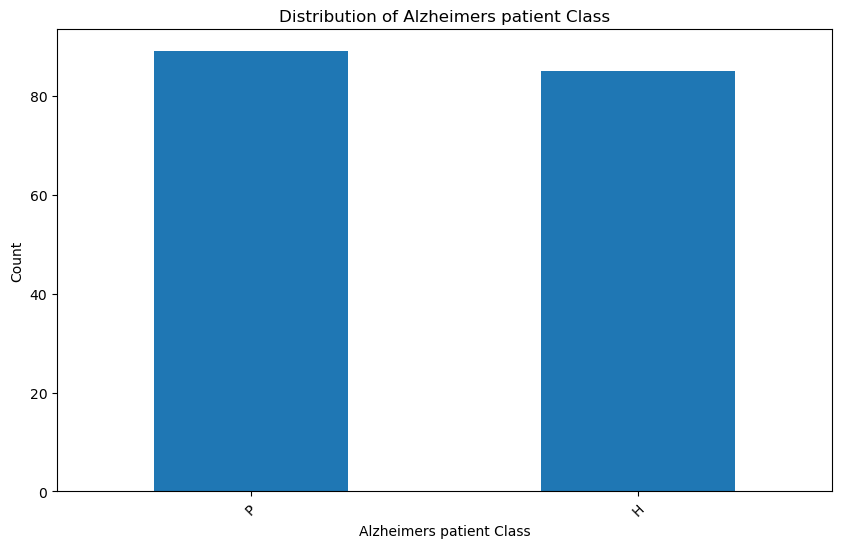

In [9]:
target_counts = df['class'].value_counts()

print(target_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar')
plt.xlabel('Alzheimers patient Class')
plt.ylabel('Count')
plt.title('Distribution of Alzheimers patient Class')
plt.xticks(rotation=45)
plt.show()

## Numerical variables

The dataset was collected when the patient performed 25 tasks, each task has the same 18 features. So for learning purpose, we will perform the EDA on 1 task for the illustration. 

In [10]:
# Subset 18 features of task 1

num_subset = df.iloc[:,0:18]

# Subset 18 features of task 1 and task 2

num_subset2 = df.iloc[:,0:36]

# Subset 18 features of task 1 , task 2 and task 3

num_subset3 = df.iloc[:,0:54]

In [11]:
num_subset.head()

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0       5160     0.000013    120.804174       86.853334               957   
1      51980     0.000016    115.318238       83.448681              1694   
2       2600     0.000010    229.933997      172.761858              2333   
3       2130     0.000010    369.403342      183.193104              1756   
4       2310     0.000007    257.997131      111.275889               987   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0              6601          0.361800            0.217459  103.828754   
1              6998          0.272513            0.144880   99.383459   
2              5802          0.387020            0.181342  201.347928   
3              8159          0.556879            0.164502  276.298223   
4              4732          0.266077            0.145104  184.636510   

   mean_jerk_in_air1  mean_jerk_on_paper1  mean_speed_in_air1  \
0           0.051836             0.021547            1.828076   
1           0.039827             0.016885            1.817744   
2           0.064220             0.020126            3.378343   
3           0.090408             0.021150            5.082499   
4           0.037528             0.018590            3.804656   

   mean_speed_on_paper1  num_of_pendown1  paper_time1  pressure_mean1  \
0              1.493242               22        10730     1679.232060   
1              1.517763               11        12460     1723.171348   
2              3.308866               10         6080     1520.253289   
3              3.542645               10         5595     1913.995532   
4              2.180544                8         4080     1819.121324   

   pressure_var1  total_time1  
0    288285.0449        15890  
1    210516.6356        64440  
2    120845.8717         8680  
3    100286.6032         7725  
4    160061.8198         6390

In [12]:
num_cols = num_subset.columns

#### Historgram

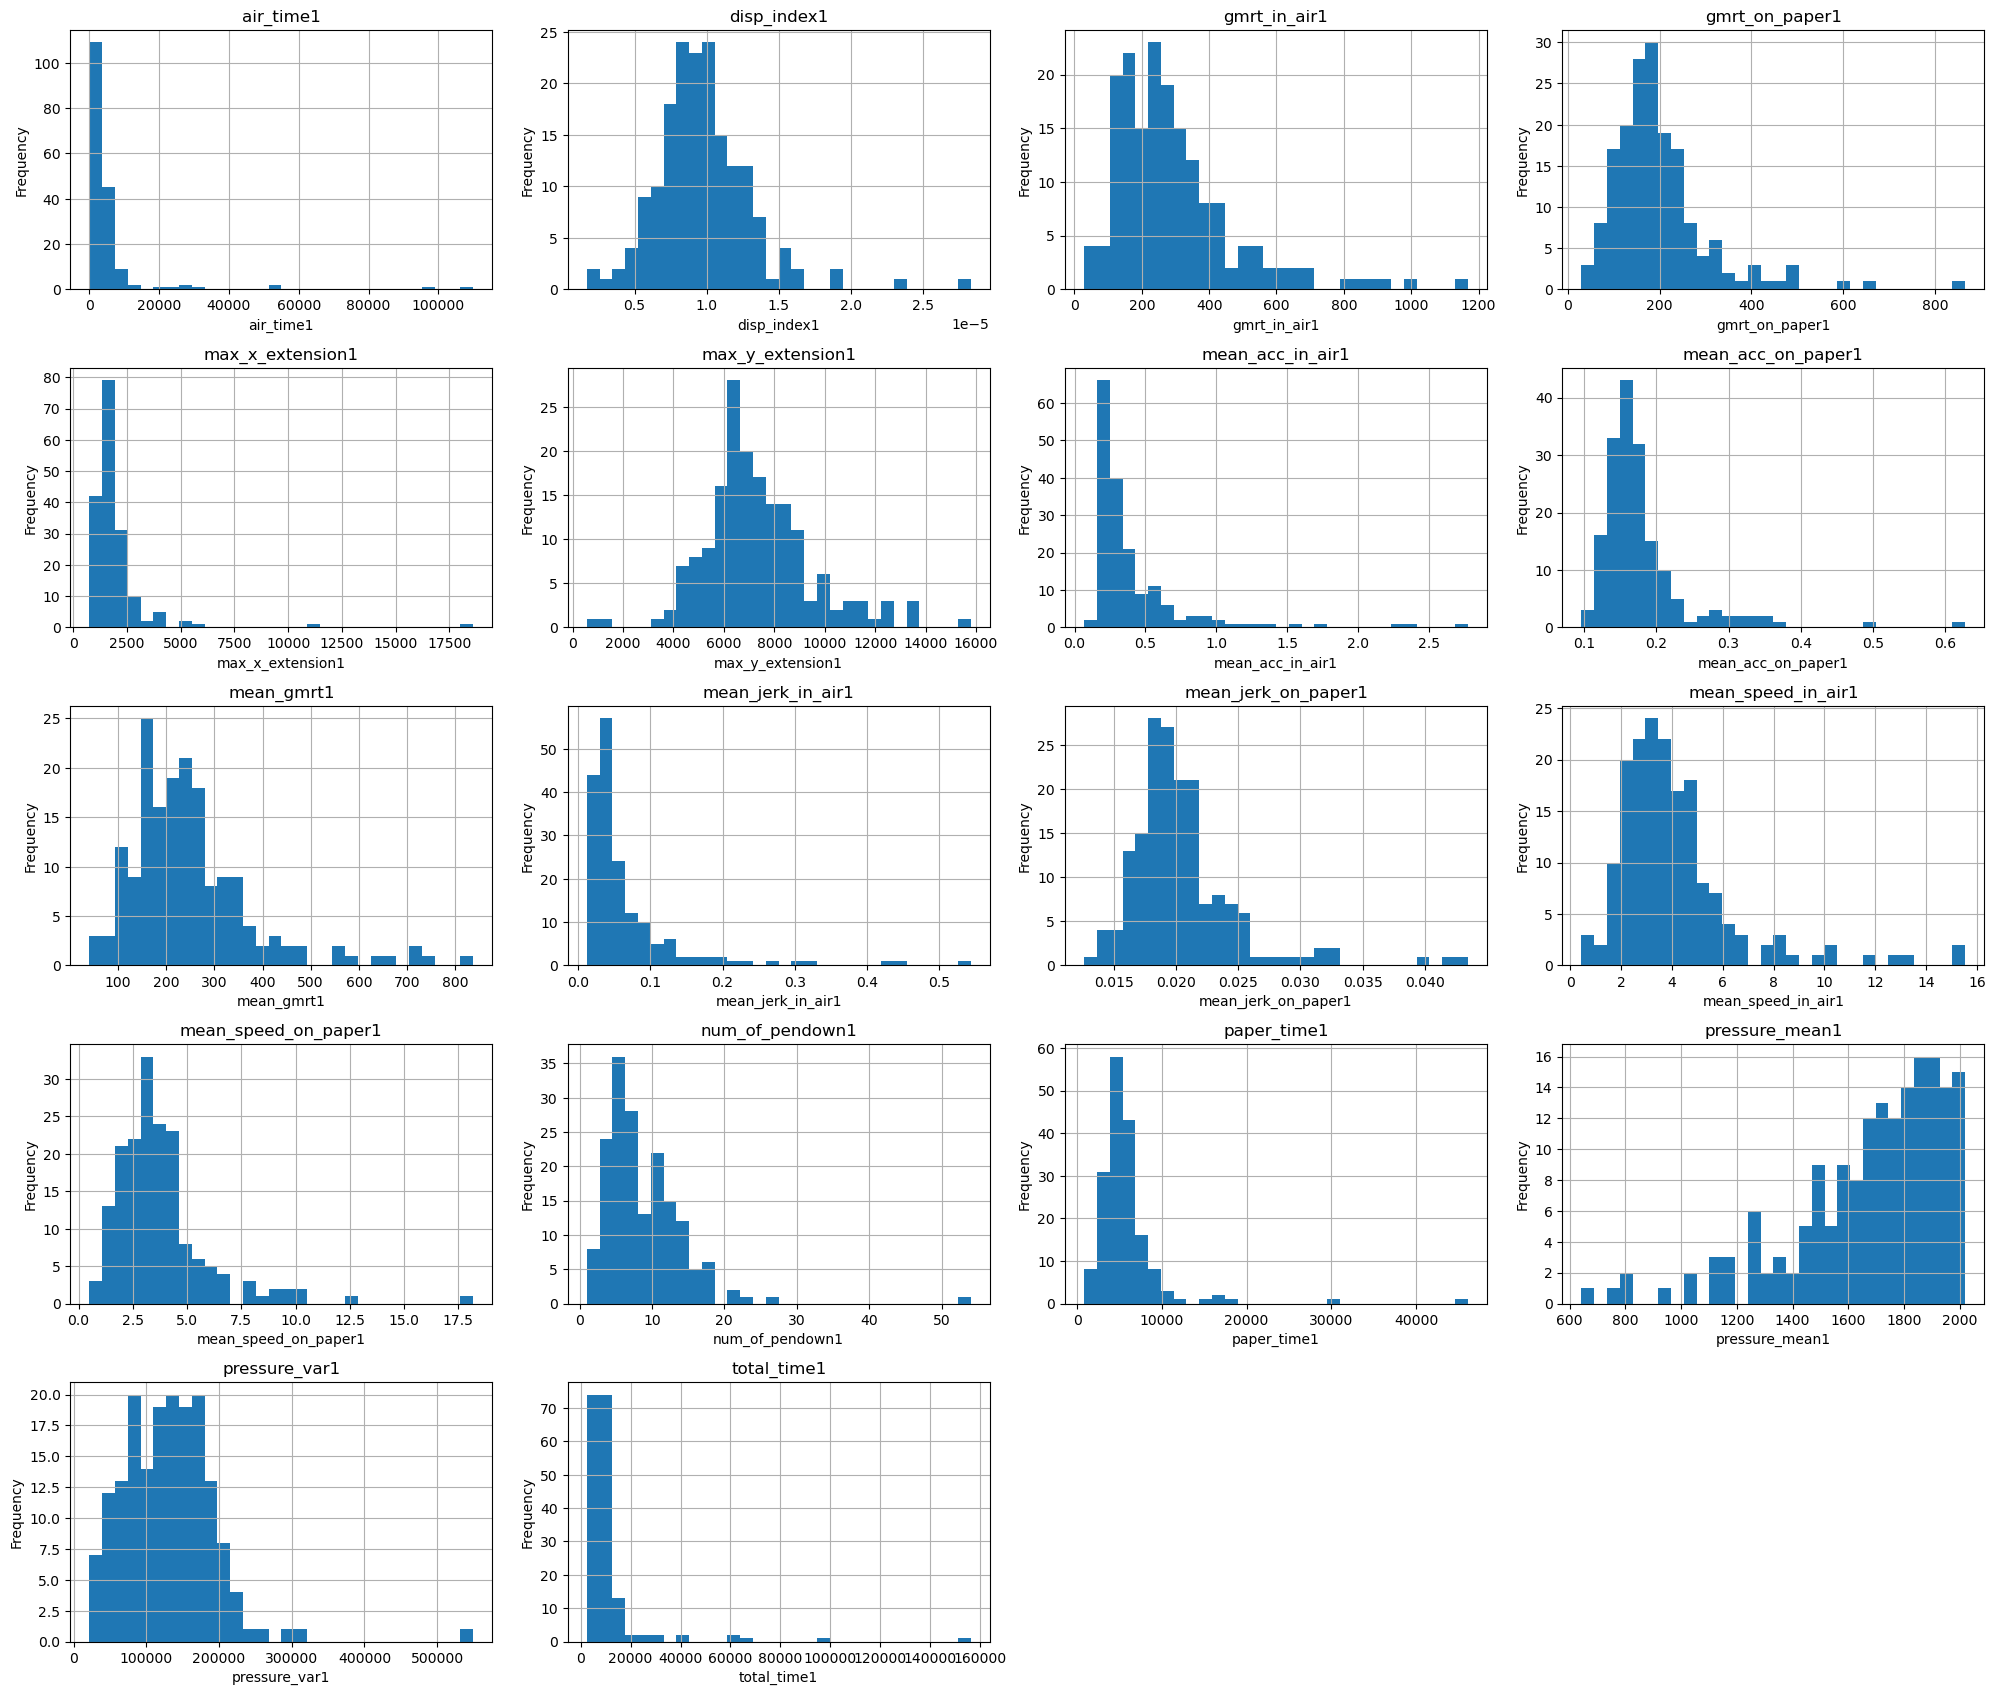

In [13]:
# Plot histograms
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)  # Adjust the number of rows and columns as needed
    num_subset[col].dropna().hist(bins=30)  # Drop NaN values for histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

#### Pair plots

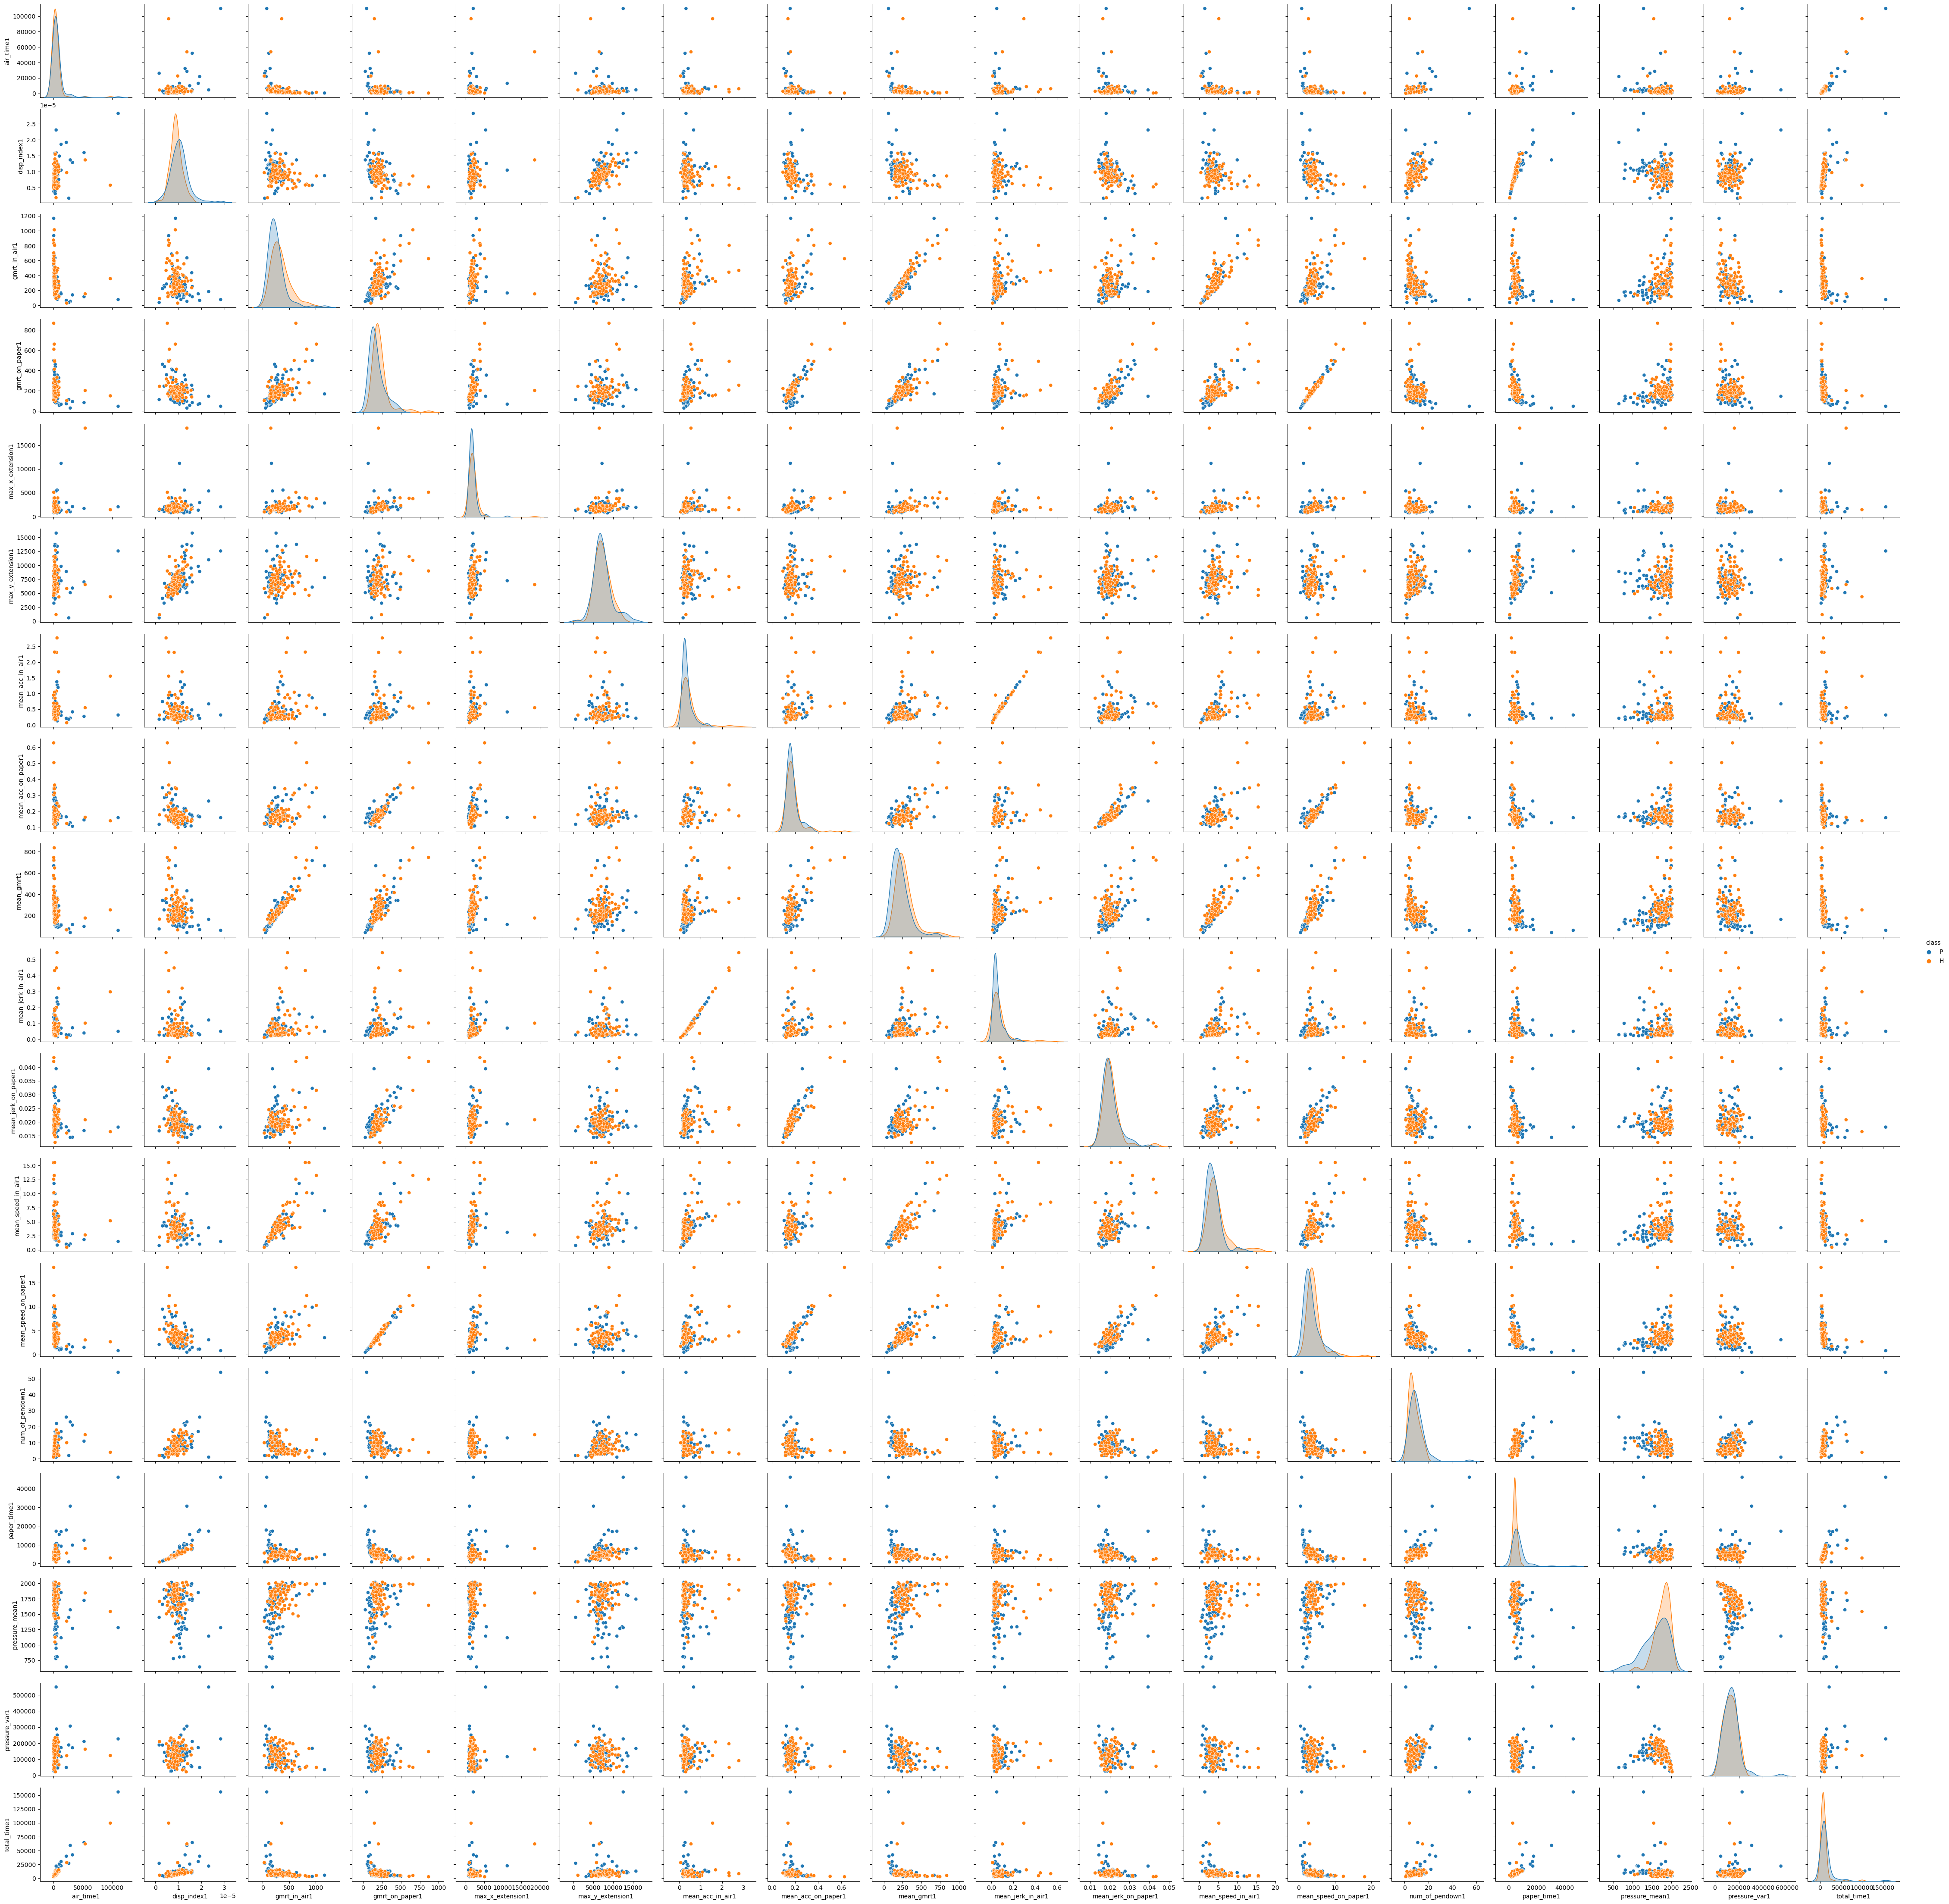

In [14]:
sns.pairplot(df[num_cols.tolist() + ['class']], hue='class')

plt.show()


#### Box plots

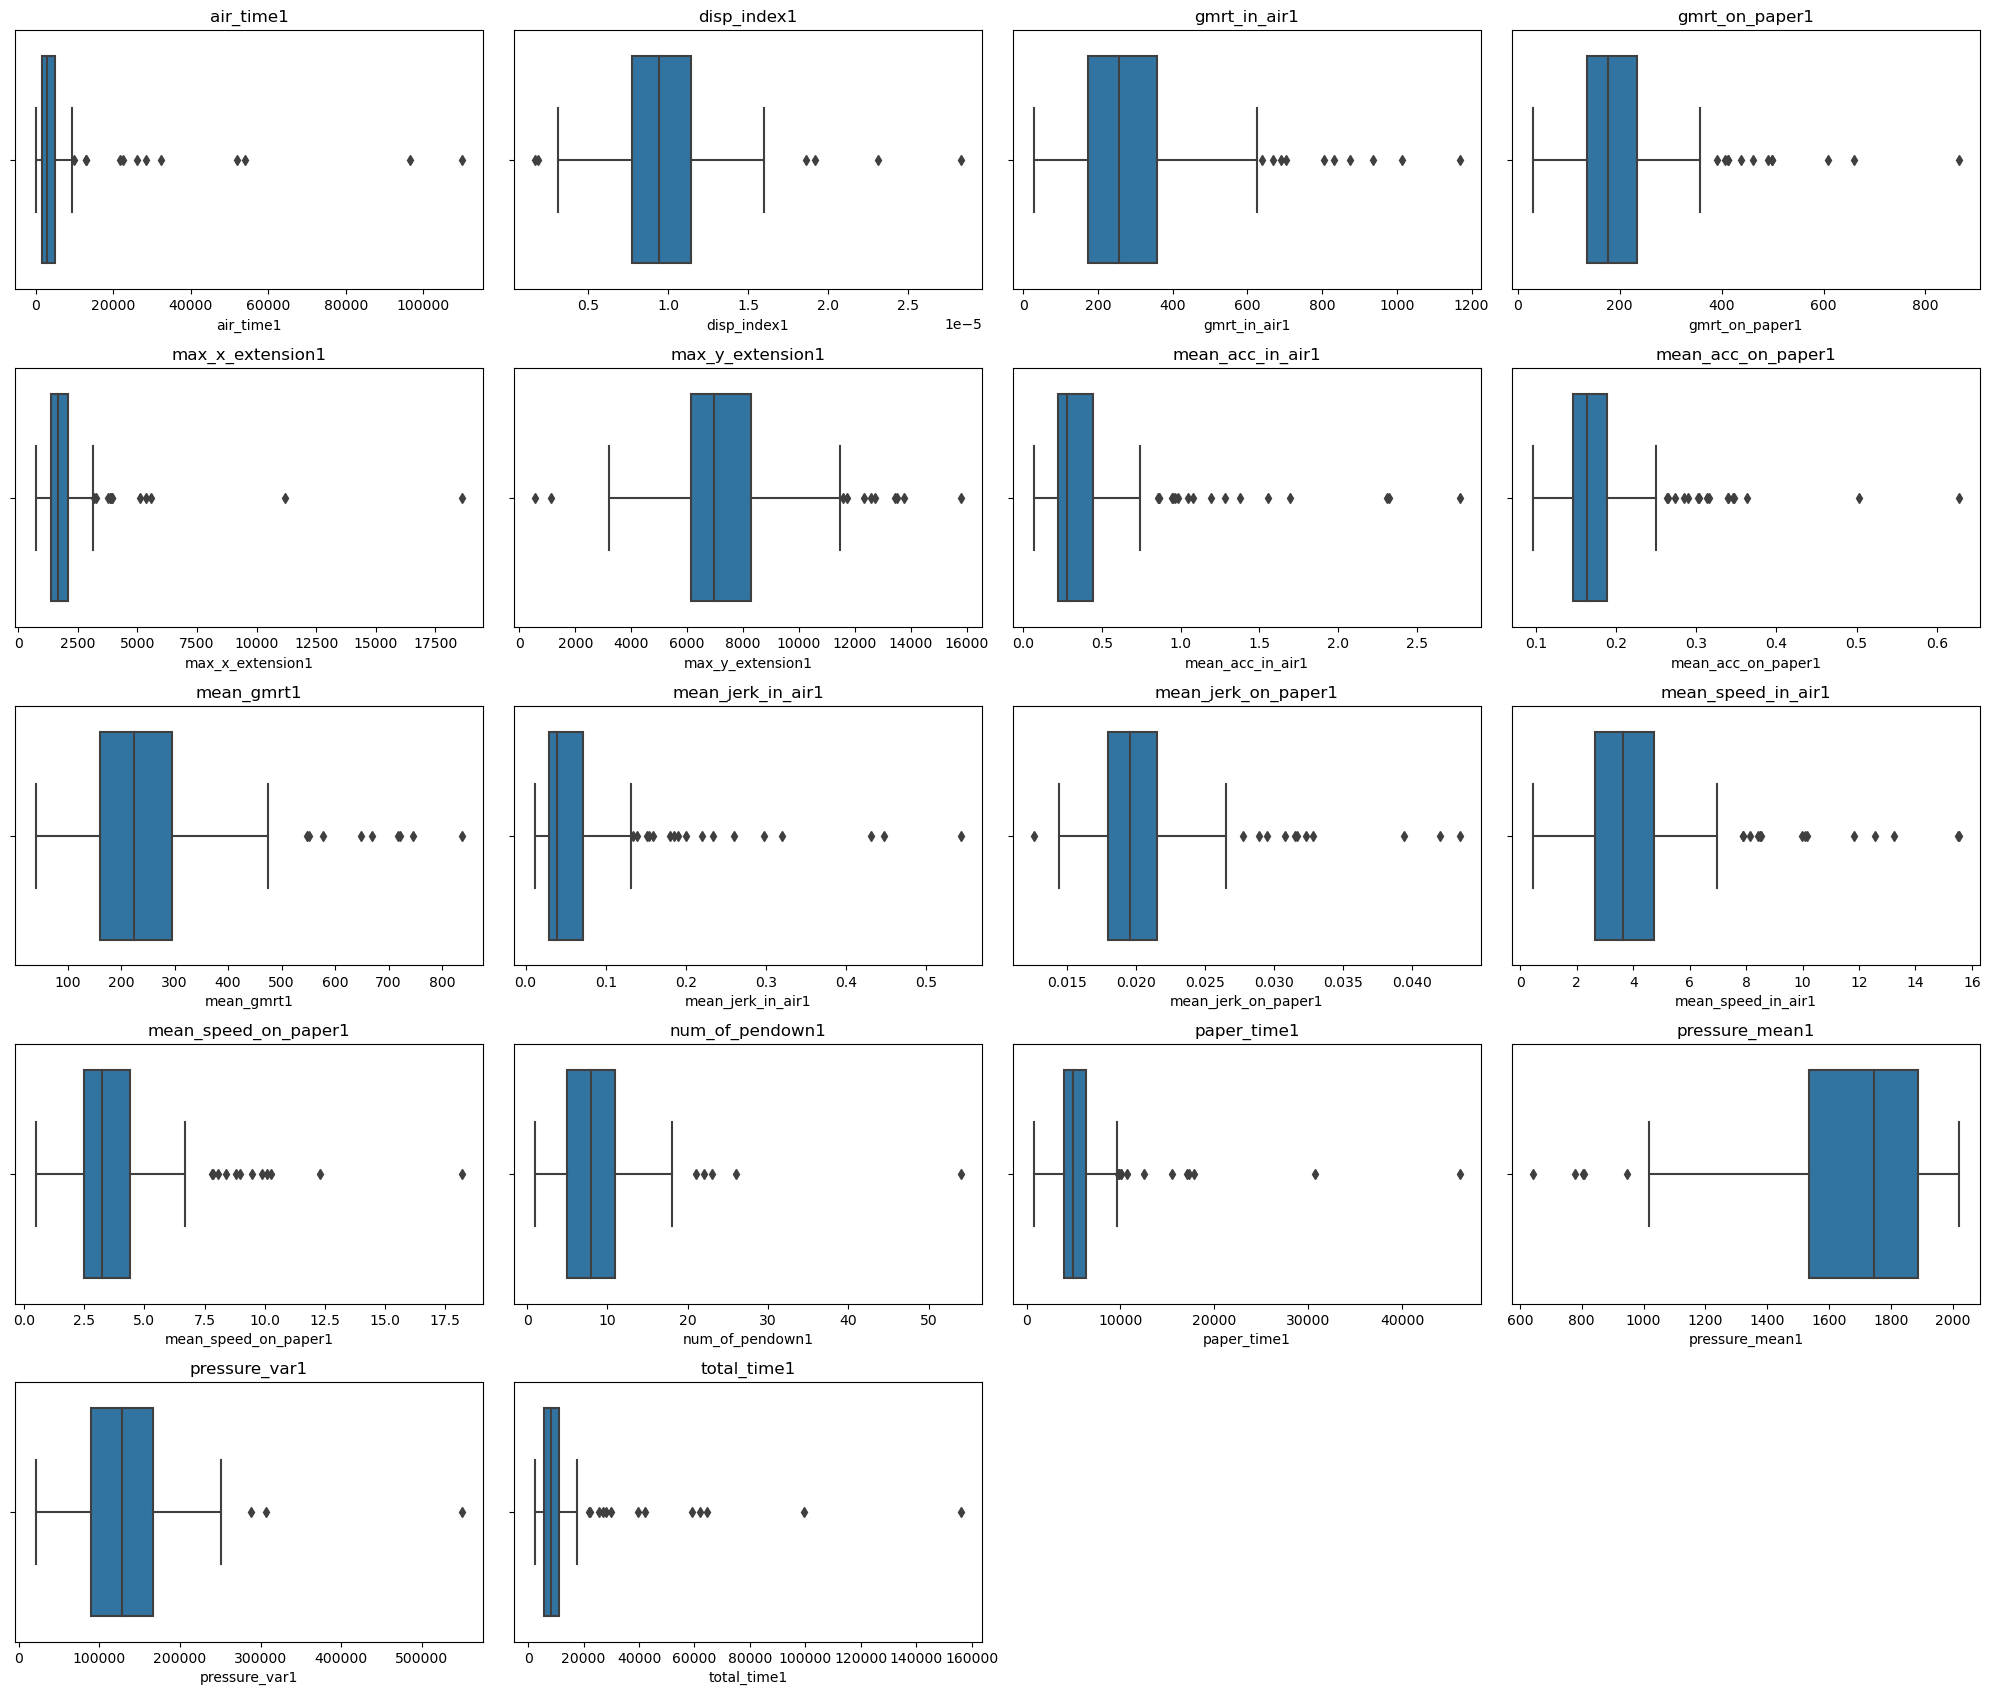

In [15]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=num_subset[col].dropna())
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

There are a lot of outliers.

#### Correlations Greater Than 0.7

In [16]:
correlation_matrix = num_subset.corr()

# Filter correlations larger than |0.7|
high_correlation = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
# Set diagonal and lower triangle to NaN to avoid duplication
for i in range(len(high_correlation)):
    for j in range(i+1):
        high_correlation.iat[i, j] = None

# Drop rows and columns with all NaN values
high_correlation = high_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)

high_correlation

mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  \
air_time1                           NaN         NaN                NaN   
disp_index1                         NaN         NaN                NaN   
gmrt_in_air1                        NaN    0.940325                NaN   
gmrt_on_paper1                 0.875478    0.828012                NaN   
mean_acc_in_air1                    NaN         NaN           0.988005   
mean_acc_on_paper1                  NaN         NaN                NaN   
mean_gmrt1                          NaN         NaN                NaN   
mean_jerk_on_paper1                 NaN         NaN                NaN   
num_of_pendown1                     NaN         NaN                NaN   
paper_time1                         NaN         NaN                NaN   

                     mean_jerk_on_paper1  mean_speed_in_air1  \
air_time1                            NaN                 NaN   
disp_index1                          NaN                 NaN   
gmrt_in_air1                         NaN            0.826749   
gmrt_on_paper1                  0.738690                 NaN   
mean_acc_in_air1                     NaN                 NaN   
mean_acc_on_paper1              0.886071                 NaN   
mean_gmrt1                           NaN            0.863950   
mean_jerk_on_paper1                  NaN                 NaN   
num_of_pendown1                      NaN                 NaN   
paper_time1                          NaN                 NaN   

                     mean_speed_on_paper1  paper_time1  total_time1  
air_time1                             NaN          NaN     0.972902  
disp_index1                           NaN     0.808375          NaN  
gmrt_in_air1                          NaN          NaN          NaN  
gmrt_on_paper1                   0.985557          NaN          NaN  
mean_acc_in_air1                      NaN          NaN          NaN  
mean_acc_on_paper1               0.896524          NaN          NaN  
mean_gmrt1                       0.822041          NaN          NaN  
mean_jerk_on_paper1              0.749382          NaN          NaN  
num_of_pendown1                       NaN     0.726058          NaN  
paper_time1                           NaN          NaN     0.757173

In [17]:
correlation_matrix = num_subset2.corr()

# Filter correlations larger than |0.7|
high_correlation = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
# Set diagonal and lower triangle to NaN to avoid duplication
for i in range(len(high_correlation)):
    for j in range(i+1):
        high_correlation.iat[i, j] = None

# Drop rows and columns with all NaN values
high_correlation = high_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)

high_correlation

mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  \
air_time1                           NaN         NaN                NaN   
disp_index1                         NaN         NaN                NaN   
gmrt_in_air1                        NaN    0.940325                NaN   
gmrt_on_paper1                 0.875478    0.828012                NaN   
mean_acc_in_air1                    NaN         NaN           0.988005   
mean_acc_on_paper1                  NaN         NaN                NaN   
mean_gmrt1                          NaN         NaN                NaN   
mean_jerk_on_paper1                 NaN         NaN                NaN   
num_of_pendown1                     NaN         NaN                NaN   
paper_time1                         NaN         NaN                NaN   
air_time2                           NaN         NaN                NaN   
disp_index2                         NaN         NaN                NaN   
gmrt_in_air2                        NaN         NaN                NaN   
gmrt_on_paper2                      NaN         NaN                NaN   
mean_acc_in_air2                    NaN         NaN                NaN   
mean_acc_on_paper2                  NaN         NaN                NaN   
num_of_pendown2                     NaN         NaN                NaN   
paper_time2                         NaN         NaN                NaN   

                     mean_jerk_on_paper1  mean_speed_in_air1  \
air_time1                            NaN                 NaN   
disp_index1                          NaN                 NaN   
gmrt_in_air1                         NaN            0.826749   
gmrt_on_paper1                  0.738690                 NaN   
mean_acc_in_air1                     NaN                 NaN   
mean_acc_on_paper1              0.886071                 NaN   
mean_gmrt1                           NaN            0.863950   
mean_jerk_on_paper1                  NaN                 NaN   
num_of_pendown1                      NaN                 NaN   
paper_time1                          NaN                 NaN   
air_time2                            NaN                 NaN   
disp_index2                          NaN                 NaN   
gmrt_in_air2                         NaN                 NaN   
gmrt_on_paper2                       NaN                 NaN   
mean_acc_in_air2                     NaN                 NaN   
mean_acc_on_paper2                   NaN                 NaN   
num_of_pendown2                      NaN                 NaN   
paper_time2                          NaN                 NaN   

                     mean_speed_on_paper1  paper_time1  total_time1  \
air_time1                             NaN          NaN     0.972902   
disp_index1                           NaN     0.808375          NaN   
gmrt_in_air1                          NaN          NaN          NaN   
gmrt_on_paper1                   0.985557          NaN          NaN   
mean_acc_in_air1                      NaN          NaN          NaN   
mean_acc_on_paper1               0.896524          NaN          NaN   
mean_gmrt1                       0.822041          NaN          NaN   
mean_jerk_on_paper1              0.749382          NaN          NaN   
num_of_pendown1                       NaN     0.726058          NaN   
paper_time1                           NaN          NaN     0.757173   
air_time2                             NaN          NaN          NaN   
disp_index2                           NaN          NaN          NaN   
gmrt_in_air2                          NaN          NaN          NaN   
gmrt_on_paper2                        NaN          NaN          NaN   
mean_acc_in_air2                      NaN          NaN          NaN   
mean_acc_on_paper2                    NaN          NaN          NaN   
num_of_pendown2                       NaN          NaN          NaN   
paper_time2                           NaN          NaN          NaN   

                     mean_gmrt2  mean_jerk_in_a

Some of the 18 features in Task 1 are highly correlated with each other, but none of the 18 features in Task 1 are highly correlated with the features in Tasks 2, 3,... or 25.

The features are highly correlated within each task only.

#### Calculate the Correlation Matrix and Identify Highly Correlated Pairs winthin each task

In [18]:
tasks = {
    "Task1": df.iloc[:, 0:18],
    "Task2": df.iloc[:, 18:36],
    "Task3": df.iloc[:, 36:54],
    "Task4": df.iloc[:, 54:72],
    "Task5": df.iloc[:, 72:90],
    "Task6": df.iloc[:, 90:108],
    "Task7": df.iloc[:, 108:126],
    "Task8": df.iloc[:, 126:144],
    "Task9": df.iloc[:, 144:162],
    "Task10": df.iloc[:, 162:180],
    "Task11": df.iloc[:, 180:198],
    "Task12": df.iloc[:, 198:216],
    "Task13": df.iloc[:, 216:234],
    "Task14": df.iloc[:, 234:252],
    "Task15": df.iloc[:, 252:270],
    "Task16": df.iloc[:, 270:288],
    "Task17": df.iloc[:, 288:306],
    "Task18": df.iloc[:, 306:324],
    "Task19": df.iloc[:, 324:342],
    "Task20": df.iloc[:, 342:360],
    "Task21": df.iloc[:, 360:378],
    "Task22": df.iloc[:, 378:396],
    "Task23": df.iloc[:, 396:414],
    "Task24": df.iloc[:, 414:432],
    "Task25": df.iloc[:, 432:450]
}

# Dictionary to store the high correlation pairs for each task
high_corr_pairs_dict = {}

for task_name, task_data in tasks.items():
    # Calculate the correlation matrix
    correlation_matrix = task_data.corr()
    
    # Filter correlations larger than |0.7|
    high_correlation = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
    
    # Set diagonal and lower triangle to NaN to avoid duplication
    for i in range(len(high_correlation)):
        for j in range(i + 1):
            high_correlation.iat[i, j] = None
    
    # Drop rows and columns with all NaN values
    high_correlation = high_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)
    
    # List the pairs that are highly correlated
    high_corr_pairs = high_correlation.stack().reset_index()
    high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    
    # Store the result in the dictionary
    high_corr_pairs_dict[task_name] = high_corr_pairs

# Print the high correlation pairs for each task
for task_name, high_corr_pairs in high_corr_pairs_dict.items():
    if not high_corr_pairs.empty:
        print(f"Highly Correlated Feature Pairs in {task_name}:")
        print(high_corr_pairs[['Feature1', 'Feature2', 'Correlation']])
        print("\n")

Highly Correlated Feature Pairs in Task1:
               Feature1              Feature2  Correlation
0             air_time1           total_time1     0.972902
1           disp_index1           paper_time1     0.808375
2          gmrt_in_air1            mean_gmrt1     0.940325
3          gmrt_in_air1    mean_speed_in_air1     0.826749
4        gmrt_on_paper1    mean_acc_on_paper1     0.875478
5        gmrt_on_paper1            mean_gmrt1     0.828012
6        gmrt_on_paper1   mean_jerk_on_paper1     0.738690
7        gmrt_on_paper1  mean_speed_on_paper1     0.985557
8      mean_acc_in_air1     mean_jerk_in_air1     0.988005
9    mean_acc_on_paper1   mean_jerk_on_paper1     0.886071
10   mean_acc_on_paper1  mean_speed_on_paper1     0.896524
11           mean_gmrt1    mean_speed_in_air1     0.863950
12           mean_gmrt1  mean_speed_on_paper1     0.822041
13  mean_jerk_on_paper1  mean_speed_on_paper1     0.749382
14      num_of_pendown1           paper_time1     0.726058
15          pa

###### Similar Pairs Across Different Tasks:

    1. air_time & total_time:
        These pairs are likely measuring time-related metrics, possibly in different contexts or phases of tasks (e.g., total time vs. specific time in the air).

    2. disp_index & paper_time:
        disp_index and paper_time could be related to indices or metrics related to paper tasks or measurements taken on paper.

    3. gmrt_in_air & mean_gmrt:
        gmrt_in_air and mean_gmrt seem to relate to metrics involving GMRT (possibly Global Mean Response Time), measured either in the air or as an average across tasks.

    4. gmrt_on_paper & mean_speed_on_paper:
        gmrt_on_paper and mean_speed_on_paper might indicate GMRT or speed-related metrics specifically measured or averaged on paper.

    5. mean_acc_in_air & mean_jerk_in_air:
        mean_acc_in_air and mean_jerk_in_air likely represent mean acceleration and mean jerk measured during tasks in the air, indicating movement or dynamic metrics.

    6. mean_acc_on_paper & mean_jerk_on_paper:
        mean_acc_on_paper and mean_jerk_on_paper similarly suggest mean acceleration and mean jerk metrics, but specifically measured or averaged during tasks on paper.



#### Run VIF for each task individually

In [19]:
vif_results = {}

# Iterate through each task
for task_name, task_data in tasks.items():
    # Add constant to the task data
    X_num = sm.add_constant(task_data)
    
    # Calculate VIF
    vif = pd.DataFrame()
    vif["Features"] = X_num.columns
    vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
    
    # Store VIF results for the current task
    vif_results[task_name] = vif

# Print or use vif_results as needed
for task_name, vif_result in vif_results.items():
    print(f"VIF for {task_name}:")
    print(vif_result)
    print("\n")

VIF for Task1:
                Features           VIF
0                  const  1.105667e+02
1              air_time1  4.021071e+13
2            disp_index1  7.928363e+00
3           gmrt_in_air1           inf
4         gmrt_on_paper1           inf
5       max_x_extension1  1.324342e+00
6       max_y_extension1  3.573801e+00
7       mean_acc_in_air1  8.697292e+01
8     mean_acc_on_paper1  1.549471e+01
9             mean_gmrt1           inf
10     mean_jerk_in_air1  7.490931e+01
11   mean_jerk_on_paper1  6.111167e+00
12    mean_speed_in_air1  8.744612e+00
13  mean_speed_on_paper1  6.005949e+01
14       num_of_pendown1  3.056514e+00
15           paper_time1  1.516364e+13
16        pressure_mean1  1.344270e+00
17         pressure_var1  1.529629e+00
18           total_time1  3.753000e+13


VIF for Task2:
                Features           VIF
0                  const  9.704804e+01
1              air_time2  9.007199e+15
2            disp_index2  4.706975e+00
3           gmrt_in_air2        

/Users/camiloestradasantos/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/camiloestradasantos/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/camiloestradasantos/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/camiloestradasantos/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/camiloestradasantos/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. 

The VIF calculations are showing some very high values, particularly for variables related to gmrt_in_air, gmrt_on_paper, and mean_gmrt, where VIFs are reported as infinity due to perfect multicollinearity. 

The goal is to reduce multicollinearity while preserving as much useful information as possible. We'll focus on removing redundant features and potentially creating new features to capture the essence of the highly correlated variables.

Time-Related Features:
    
    Keep: total_time for each task (captures overall task duration)
    Remove: air_time and paper_time (highly correlated with total_time)
    Feature Engineering:
    Air-to-Paper Ratio: air_time / paper_time (measures relative time in air vs. on paper)

GMRT Features:

    Primary GMRT Feature: Keep mean_gmrt for each task, as it represents the average global mean relative tremor.
    Redundant GMRT Features: Remove gmrt_in_air and gmrt_on_paper since they contribute heavily to the mean_gmrt.

Speed Features:
   
    Keep: mean_speed_on_paper for each task (directly measures writing speed)
    Remove: mean_speed_in_air (less directly related to handwriting quality)

Movement Smoothness Features:
    
    Keep: mean_jerk_in_air and mean_jerk_on_paper (captures smoothness of movement)
    Remove: mean_acc_in_air and mean_acc_on_paper (highly correlated with jerk features)

Pressure Features:
    
    Remove: pressure_mean and pressure_var (capture overall pressure and variation)
    Feature Engineering:
    Pressure Variation Index: pressure_var / pressure_mean (measures pressure fluctuation)

Spatial Features:
    
    Keep: disp_index (measures how much of the paper is used)
    Remove: max_x_extension and max_y_extension (measure writing extent)
    Feature Engineering:
    Writing Area: max_x_extension * max_y_extension (captures the overall area covered)

Pendowns Number:
    
    Keep: num_of_pendown (measures how many times the pen touches the paper)

In [20]:
# Remove rows from your dataset X where any column has the value "0.000000"

# Convert "0.000000" to numeric 0
df = df.replace("0.000000", 0)

# Check if any column has 0 and filter rows
df = df[(df != 0).all(axis=1)]

## Missing values

In [21]:
print(f"There are {sum(df.isnull().sum() > 0)} missing values.")

There are 0 missing values.


## Compute the Mahalanobis distance and detect outliers

In [22]:
def mahalanobis_distance(data):

    data_array = data.to_numpy()
    
    mean_vector = np.mean(data_array, axis=0)
    
    cov_matrix = np.cov(data_array, rowvar=False)
    
    cov_inv = np.linalg.inv(cov_matrix)
    
    diff = data_array - mean_vector
    mahalanobis_dist = np.sqrt(np.sum(np.dot(diff, cov_inv) * diff, axis=1))
    
    return mahalanobis_dist

def detect_outliers(data, threshold=0.95):
    
    mahalanobis_dist = mahalanobis_distance(data)
    
    chi2_threshold = chi2.ppf(threshold, df=data.shape[1])
    
    outlier_indices = np.where(mahalanobis_dist > chi2_threshold)[0]
    
    return outlier_indices

outlier_indices = detect_outliers(df.iloc[:,:-1])

# Print indices of outlier data points
print("Indices of outlier data points:", outlier_indices)

print("Outlier percentages (%): ", len(outlier_indices)/len(df)*100)

Indices of outlier data points: []
Outlier percentages (%):  0.0


/var/folders/m2/r3np675n07xdfhh3c3947st80000gn/T/ipykernel_24531/3364540850.py:12: RuntimeWarning: invalid value encountered in sqrt
  mahalanobis_dist = np.sqrt(np.sum(np.dot(diff, cov_inv) * diff, axis=1))


In [23]:
clean_df = df
clean_df

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0         5160     0.000013    120.804174       86.853334               957   
1        51980     0.000016    115.318238       83.448681              1694   
3         2130     0.000010    369.403342      183.193104              1756   
4         2310     0.000007    257.997131      111.275889               987   
5         1920     0.000011    199.764957      109.902254              1548   
..         ...          ...           ...             ...               ...   
169       2930     0.000010    241.736477      176.115957              1839   
170       2140     0.000009    274.728964      234.495802              2053   
171       3830     0.000008    151.536989      171.104693              1287   
172       1760     0.000008    289.518195      196.411138              1674   
173       2875     0.000008    235.769350      178.208024              1838   

     max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0                6601          0.361800            0.217459  103.828754   
1                6998          0.272513            0.144880   99.383459   
3                8159          0.556879            0.164502  276.298223   
4                4732          0.266077            0.145104  184.636510   
5                6260          0.212523            0.143013  154.833606   
..                ...               ...                 ...         ...   
169              6439          0.253347            0.174663  208.926217   
170              8487          0.225537            0.174920  254.612383   
171              7352          0.165480            0.161058  161.320841   
172              6946          0.518937            0.202613  242.964666   
173              6560          0.567311            0.147818  206.988687   

     mean_jerk_in_air1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0             0.051836  ...            0.141434              0.024471   
1             0.039827  ...            0.049663              0.018368   
3             0.090408  ...            0.113905              0.019860   
4             0.037528  ...            0.121782              0.020872   
5             0.028369  ...            0.131135              0.018907   
..                 ...  ...                 ...                   ...   
169           0.032691  ...            0.119152              0.020909   
170           0.032059  ...            0.174495              0.017640   
171           0.022705  ...            0.114472              0.017194   
172           0.090686  ...            0.114472              0.017194   
173           0.099555  ...            0.114472              0.017194   

     mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  \
0               5.596487               3.184589                71   
1               1.665973               0.950249               129   
3               4.206746               1.613522               123   
4               3.319036               1.680629                92   
5               3.643543               1.667827                76   
..                   ...                    ...               ...   
169             4.508709               2.233198                96   
170             4.685573               2.806888                84   
171             3.493815               2.510601                88   
172             3.493815               2.510601                88   
173             3.493815               2.510601                88   

     paper_time25  pressure_mean25  pressure_var25  total_time25  class  
0           40120      1749.278166     296102.7676        144605      P  
1          126700      1504.768272     278744.2850        298640      P  
3           67945      1465.843329     230184.7154        181220      P  
4           37285      1841.702561     158290.0255         72575      P  
5           43790      1081.054579     152045.4446         74605      P  
..   